## Exercise 1: $k$-NN Fundamentals (20%)


Here we will try classification of the famous handwritten digits data set. 

This data set exists in many forms; we will use the one bundled in `sklearn.datasets` in python. We suggest you also use `sklearn` for classification, but you can use R if you'd like.

Load the data:

In [79]:
from sklearn import datasets
import matplotlib.pyplot as plt
import random
%matplotlib inline

digits = datasets.load_digits()

You can check out the documentation for the data by running `print(digits['DESCR'])`. We'll extract the features and labels for you:

In [80]:
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bloc

In [81]:
X = digits['data'] # this is the data with each 8x8 image "flattened" into a length-64 vector.
Y = digits['target'] # these are the labels (0-9).
Z = digits['images']

Here's a plot of a random example:

Text(0.5, 1.0, 'This is a 5')

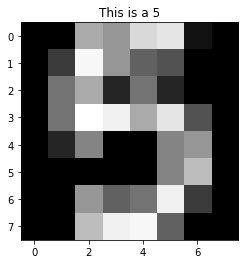

In [82]:
idx = random.randint(0, digits['images'].shape[0]-1) 
plt.imshow(digits['images'][idx], cmap='Greys_r')
plt.title('This is a %d' % digits['target'][idx])

### 1(a) Fundamentals


1. How many features are there, and what are they?
2. Which is closer to element 0 (`X[0]`) -- element 1 (`X[1]`) or element 2 (`X[2]`)? Report the two distances (Euclidean).
3. Using the above information, if only elements 1 and 2 are used in a $k$-NN classifier with $k=1$, what would element 0 be classified as, and why?

### 1(a)

### Part 1

Z is a matrix of images, Y is it's labels, and X is its corresponding data. We first check whether each image has a corresponding label and vector. 

In [83]:
# Find length of X
len(X)

1797

In [84]:
# Find length of Y
len(Y)

1797

In [85]:
# Find length of Z
len(Z)

1797

Since all values are 1797, all images have a corresponding data and label.

In [86]:
a = X.shape
a
print(a[1])

64


The 1797 images are each represented by 64 element vector. They are the pixels that are used to represent each image.

### Part 2
#### Distances:

In [87]:
import numpy as np

In [88]:
# Element 0 to 1: X[0] and X[1] 
np.linalg.norm(X[0]-X[1])

59.55669567731239

In [89]:
# Element 0 to 2: X[0] and X[2]
np.linalg.norm(X[0]-X[2])

54.12947441089743

Element X[2] is closer to X[0]

### Part 3
The k-NN method is a classification method that helps us group like elements based on the number of 'neighbors' we are taking into account (k-value). When k=1, the element closest to element 0 will be given the same classification as it. And between element 1 and element 2, element 2 is closer, element 2 will have the same classification as element 0.

### 1(b) Investigating error

You'll be using a $k$-NN classifier. Documentation for python is available [here](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html); for R, [here](https://stat.ethz.ch/R-manual/R-patched/library/class/html/knn.html).

Using `k=10`, fit a $k$-NN classifier using `X` and `Y` using all of the data as your training data. Obtain predictions from `X`. 

1. What proportion of these predictions are incorrect? This is called the _error rate_.    
2. Choose one case that was not predicted correctly. What was predicted, and what is the correct label? Plot the image, and comment on why you think the classifier made a mistake. 



In [90]:
#Import packages and dataset
from sklearn import datasets
import matplotlib.pyplot as plt
import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

In [91]:
#Create the kNN model 
kNN = KNeighborsClassifier(n_neighbors=10)

In [92]:
#Train the model
kNN.fit(X, Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [93]:
# Predictions
pred_values = kNN.predict(X)

#Error rate calculation
b = accuracy_score(Y, pred_values)
1-b


0.014468558708959356

The proportion of predictions that are incorrect are 1.447%

#### Incorrect Predictions

In [94]:
error_values = [] #create an empty list for errors

In [95]:
#Run a loop to check if they equal to the index values of Y
# Subsequently populate the error list
for index, value in np.ndenumerate(pred_values):
    if value != Y[index]:
        error_values.append(index[0])

In [96]:
#Picking one of the elements of errors: 24
len(error_values)
incorrect_values = error_values[25]

Plotting one of the incorrect images:

Text(0.5, 1.0, 'The incorrect prediction is 1')

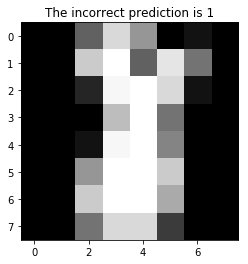

In [97]:
plt.imshow(Z[incorrect_values], cmap='Greys_r')
plt.title('The incorrect prediction is %d' % pred_values[incorrect_values])

The model that we created returns the predicted value as 1 for the image above. From a closer observation however the number in the image resemembles a 9. I assume this mistake was made due to the fact that the detail in the image is not discernible due to low clarity and resolution of of the image. I think the model made a mistake because of pixels (2, 1), (4, 0) rememble in  numerical(grayscale) the value of pixels (2, 6) and (5, 1), which may have made the model think that the pixels[(2, 1) and (4, 0)] is not part of the image pattern and so it returned 1. Indeed from a first observation, the naked eye also has difficulty deciding which number this is. When proceeding, we'd also need to randomly shuffle the image stack before modelling to reduce bias.

### 1(c) One Nearest Neighbour error

Now fit the classifier using `k=1`, using all of your data as training data, and again obtain predictions from `X`. 

1. What proportion of these predictions are incorrect? Briefly explain why this error rate is achieved (in one or two sentences; think about how the $k$-NN algorithm works).    
2. With the above error rate in mind, if I give you a new handwritten digit (not in the data set), will the classifier _for sure_ predict the label correctly? Briefly explain why or why not.

In [98]:
#kNN model with k=1 
# Train the kNN model on all of the data
knn_trained = KNeighborsClassifier(n_neighbors=1)
knn_trained.fit(X, Y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [99]:
predict_trained = knn_trained.predict(X)

#Calculating the accuracy 
# Accuracy - 1 is the error
acc = accuracy_score(Y, predict_trained)
acc


1.0

In [100]:
print(1.0 - acc)

0.0


1. Since the accuracy is 1.0 (100%) the error we get is 0 (0%). In the case of image classification, this makes sense since each image element is first translated to a numerical matrix representation, after which the k Nearest Neighbours attributes it to the value of the image, whose eucledian distance is closest to the reference image. We must note, before proceeding that the set is sequentially sorted which creates a bias in the data. Going forward, we would need to randomly shuffle the values to reduce bias in the model.

2. With the above error rate in mind, if I give you a new handwritten digit (not in the data set), will the classifier for sure predict the label correctly? Briefly explain why or why not. Although the model may return an accurate prediction we CANNOT say with 100% certainity that an accurate prediction will be made every time. Although we calculated a 0% error in the model we did not account for bias, and nor did we try the model on the test data. In doing so it is highly likely that the error would not have been 0%- a value which we would have then had to minimize.

## Exercise 2: Investigating $k$-NN Error (15%)

This is a continuation of Exercise 1. Each part asks you to investigate some scenario.

__Note__: For this specific data set, you might not be able to overfit with $k$-NN! So don't worry if you can't find an example of overfitting.

__Attribution__: This exercise was adapted from DSCI 571.

__Choose *ONE* of 2(a) or 2(b) to complete.__ If you did both, we'll grade 2(a) only (or 2(b) if you say so).

### 2(a) The influence of k

**You do not have to do this question if you completed 2(b)**

Now, split the data into _training_ and _test_ sets. You can choose any reasonable fraction for training vs. testing (50% will do). 

__Note__: It's always a good idea to randomly shuffle the data before splitting, in case the data comes ordered in some way. (For example, if they are ordered by label, then your training set will be all the digits 0-4, and your test set all the digits 5-9, which would be bad... you might end up with 100% error!!) To shuffle your data, you can use [`numpy.random.shuffle`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.shuffle.html) in python, or [`sample_n`](https://dplyr.tidyverse.org/reference/sample.html) in R.

For various values of $k$, fit (a.k.a. _train_) a classifier using the training data. Use that classifier to obtain an error rate when predicting on both the training and test sets, for each $k$. How do the training error and test error change with $k$? Make a plot to show the trends, and briefly comment on the insights that this plot yields.

### 2(b) The influence of data partition

**You do not have to do this question if you completed 2(a)**

Now, choose your favourite value of $k$, but vary the proportion of data reserved for the training set, again obtaining training and test error rates for each partition of the data. Plot training and test error (on the same axes) vs. the proportion of training examples. Briefly comment on the insights that this plot yields.

#### Ans:

As mentioned in the above answers, we first shuffle the dataset to prevent numerical sorting. 

In [101]:
#This shuffles the array
order = np.random.permutation(X.shape[0])

In [102]:
X = X[order]
Y = Y[order]
Z = Z[order]

We also still need to ensure that the corresponding X, Y, and Z values for each are maintained.

Text(0.5, 1.0, 'The value for this image after shuffling is is 3')

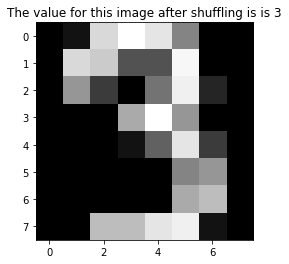

In [103]:
#Run a check on an arbitrary number (4) to see if the corresponding X, Y and Z have been maintained.
plt.imshow(Z[5], cmap='Greys_r')
plt.title('The value for this image after shuffling is is %d' % Y[5])

The order is maintained. We now proceed to creating the split. Use a 70/30 split.

In [104]:
x_trn, x_tst, y_trn, y_tst = train_test_split(X, Y, test_size = 0.3)

The first step would be to train the classification model on the training data with various values of k. From that we'd get errors for various values of k on both the training and test data sets, which we'd want to minimize.

In [132]:
#Assuming values of k from 1 to 30
kvalues = range(1, 40)

# 1. Initialize empty training prediction error list
trn_pred_err = []

# 2. Initialize empty training prediction error list
tst_pred_err = []

In [133]:
for k in kvalues:
    knn_variance = KNeighborsClassifier(n_neighbors=k)
    knn_variance.fit(x_trn, y_trn)
    pred_tst = knn_variance.predict(x_tst)
    pred_trn = knn_variance.predict(x_trn)
    
    trn_pred_err.append(1 - accuracy_score(y_trn, pred_trn))
    tst_pred_err.append(1 - accuracy_score(y_tst, pred_tst))
    

Append now to the empty error lists

### Creating the plots

#### Plot of k-values vs training errors

[Text(0, 0.5, 'Error obtained from training'), Text(0.5, 0, 'K-values')]

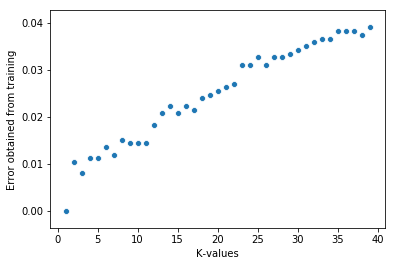

In [134]:
tr_gr = sns.scatterplot(x=kvalues, y=trn_pred_err)
tr_gr.set(xlabel="K-values", ylabel="Error obtained from training")

#### Plot of k-values vs test errors

[Text(0, 0.5, 'Error obtained from testing'), Text(0.5, 0, 'K-value')]

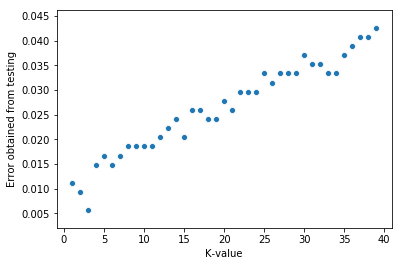

In [135]:
t_gr = sns.scatterplot(x=kvalues, y=tst_pred_err)
t_gr.set(xlabel="K-value", ylabel="Error obtained from testing")

### Insights on the graphs

Firstly, both training error and test error increase as k increases. In practical application however, training error is always higher than the test error. We notice a dip in the test error at about 4 after which it increases agai. We'd expect the error vs k-value plot to have a parabolic distribution with a minima denoting the optimal k. From the training error plot there are no distinct observable minima nor a parabolic shape. The second plot however does show a more parabolic curve however it is still relatively indistinct. When we plot further we find local minima occuring in a range of k-value, 1 to 5 and 10 to 20. At the global minima(k-value=4) is the ideal value of k.

In [136]:
# The errors are:
tst_pred_err[0]

0.011111111111111072

In [137]:
tst_pred_err[1]

0.0092592592592593

In [138]:
tst_pred_err[4]

0.01666666666666672